In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Path dataset
base_dir = 'chest_xray'

# Preprocessing - ImageDataGenerator untuk augmentasi dan normalisasi
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Memuat data training
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training')

# Memuat data validation
validation_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation')

# Memuat data test
test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [2]:
from tensorflow.keras import layers, models

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Menampilkan arsitektur model
model.summary()

# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback untuk menghentikan pelatihan jika performa model tidak meningkat
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)


Epoch 1/20


C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 75s 542ms/step - accuracy: 0.7730 - loss: 0.5526 - val_accuracy: 0.8571 - val_loss: 0.3230
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
C:\Users\Pixiedust\AppData\Roaming\Python\Python312\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 73s 538ms/step - accuracy: 0.8833 - loss: 0.2813 - val_accuracy: 0.8686 - val_loss: 0.3003
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 73s 534ms/step - accuracy: 0.9034 - loss: 0.2413 - val_accuracy: 0.8974 - val_loss: 0.2486
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 72s 531ms/step - accuracy: 0.9232 - loss: 0.1902 - val_accuracy: 0.9070 - val_loss: 0.2126
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 72s 533ms/step - accuracy: 0.9438 - loss: 0.1557 - val_accuracy: 0.9271 - val_loss: 0.1668
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 68s 498ms/step - accuracy: 0.9267 - loss: 0.1847 - val_accura

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluasi model pada data test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Mendapatkan prediksi
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred)

# Confusion matrix dan classification report
print(confusion_matrix(test_generator.classes, y_pred))
print(classification_report(test_generator.classes, y_pred, target_names=['Normal', 'Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.8933 - loss: 0.3634
Test Accuracy: 0.9118589758872986
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step
[[ 67 167]
 [128 262]]
              precision    recall  f1-score   support

      Normal       0.34      0.29      0.31       234
   Pneumonia       0.61      0.67      0.64       390

    accuracy                           0.53       624
   macro avg       0.48      0.48      0.48       624
weighted avg       0.51      0.53      0.52       624



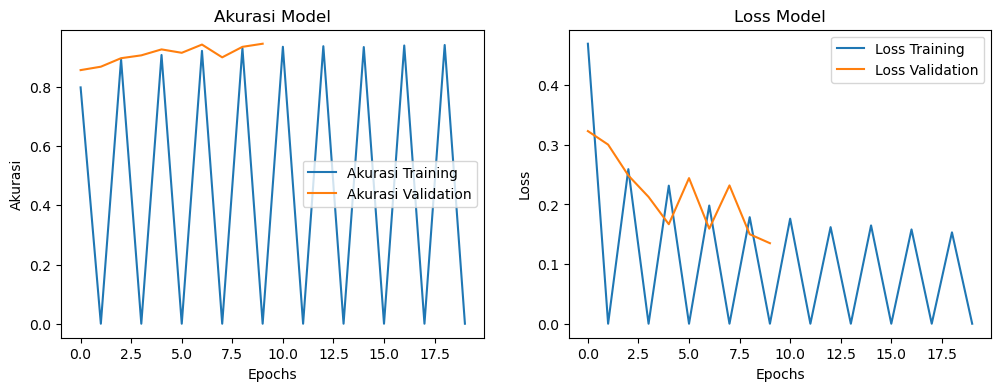

In [5]:
import matplotlib.pyplot as plt

# Plotting Akurasi
plt.figure(figsize=(12, 4))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.title('Akurasi Model')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title('Loss Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


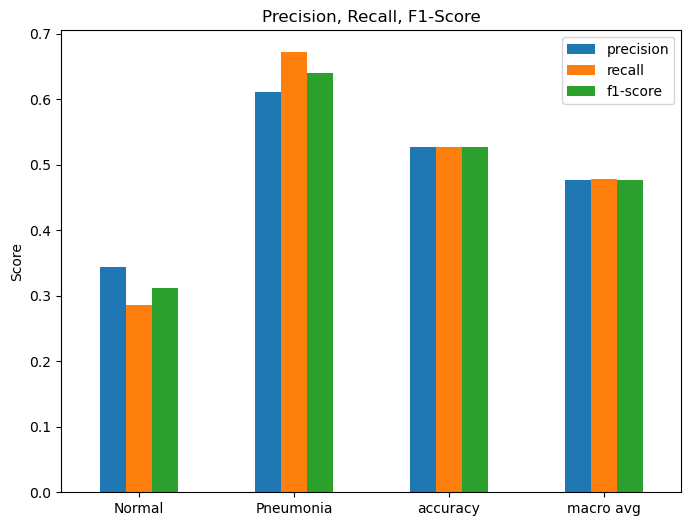

In [6]:
from sklearn.metrics import classification_report
import pandas as pd

# Mendapatkan laporan klasifikasi
report = classification_report(test_generator.classes, y_pred, target_names=['Normal', 'Pneumonia'], output_dict=True)

# Mengubah ke DataFrame
report_df = pd.DataFrame(report).transpose()

# Visualisasi precision, recall, dan f1-score
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, F1-Score')
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.show()


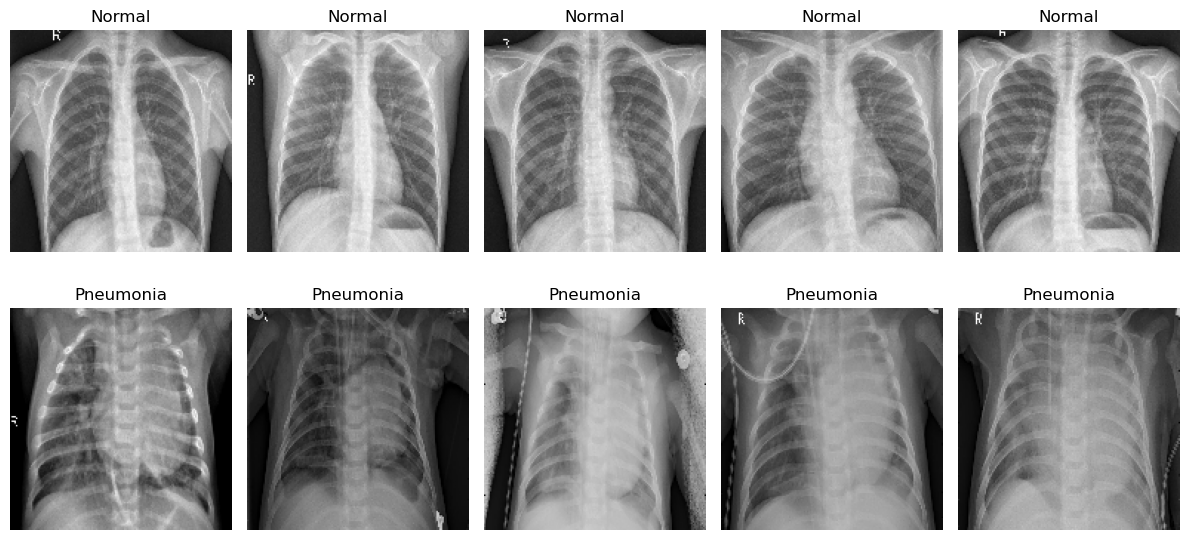

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# Menampilkan gambar contoh dari kelas 'Normal' dan 'Pneumonia'

# Path ke dataset gambar Normal dan Pneumonia
normal_dir = 'chest_xray/test/NORMAL'
pneumonia_dir = 'chest_xray/test/PNEUMONIA'

# Mengambil beberapa contoh gambar dari kedua kelas
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)[:5]]
pneumonia_images = [os.path.join(pneumonia_dir, img) for img in os.listdir(pneumonia_dir)[:5]]

# Membuat plot untuk membandingkan gambar Normal dan Pneumonia
plt.figure(figsize=(12, 6))

# Menampilkan 5 gambar Normal
for i, img_path in enumerate(normal_images):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.squeeze(img_array), cmap='gray')
    plt.title("Normal")
    plt.axis('off')

# Menampilkan 5 gambar Pneumonia
for i, img_path in enumerate(pneumonia_images):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalisasi gambar
    plt.subplot(2, 5, i + 6)
    plt.imshow(np.squeeze(img_array), cmap='gray')
    plt.title("Pneumonia")
    plt.axis('off')

plt.tight_layout()
plt.show()
